In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Country_clusters.csv")
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
df1 = pd.get_dummies(df)
df1

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,44.97,-103.77,0,0,0,0,0,1,1,0,0
1,62.40,-96.80,0,1,0,0,0,0,1,0,0
2,46.75,2.40,0,0,1,0,0,0,0,1,0
3,54.01,-2.53,0,0,0,0,1,0,1,0,0
4,51.15,10.40,0,0,0,1,0,0,0,0,1
5,-25.45,133.11,1,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [5]:
x = df[['Latitude', 'Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

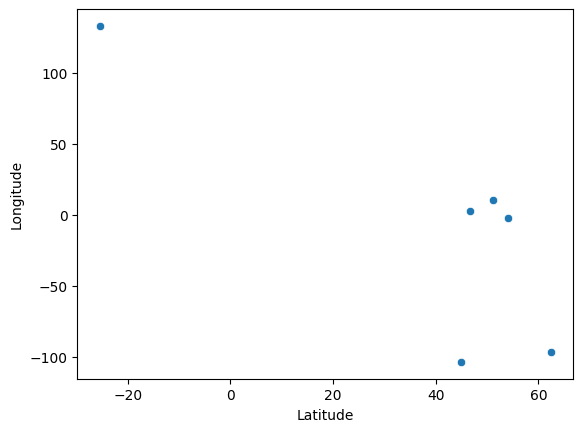

In [6]:
sns.scatterplot(x = df['Latitude'], y=df['Longitude'])

# Scaling

In [33]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x)

x = pd.DataFrame(array, columns=x.columns)
x

,Latitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


In [4]:
df1

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,44.97,-103.77,0,0,0,0,0,1,1,0,0
1,62.40,-96.80,0,1,0,0,0,0,1,0,0
2,46.75,2.40,0,0,1,0,0,0,0,1,0
3,54.01,-2.53,0,0,0,0,1,0,1,0,0
4,51.15,10.40,0,0,0,1,0,0,0,0,1
5,-25.45,133.11,1,0,0,0,0,0,1,0,0


In [8]:
# Scaling on Get Dummies Dataset
std_scalar = StandardScaler()
array = std_scalar.fit_transform(df1[['Latitude', 'Longitude']])

x_scaled = pd.DataFrame(array, columns=['Latitude', 'Longitude'])

x = pd.concat([x_scaled, df1.drop(['Latitude', 'Longitude'], axis=1)], axis= 1)
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,0.204344,-1.193114,0,0,0,0,0,1,1,0,0
1,0.798128,-1.104870,0,1,0,0,0,0,1,0,0
2,0.264983,0.151062,0,0,1,0,0,0,0,1,0
3,0.512308,0.088645,0,0,0,0,1,0,1,0,0
4,0.414877,0.252347,0,0,0,1,0,0,0,0,1
5,-2.194639,1.805930,1,0,0,0,0,0,1,0,0


# Model Building

In [9]:
kmean_model = KMeans(n_clusters=3)
y_pred = kmean_model.fit_predict(x)
y_pred

array([0, 0, 2, 0, 2, 1])

In [10]:
# How to add Target Column
x['Target'] = y_pred
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German,Target
0,0.204344,-1.193114,0,0,0,0,0,1,1,0,0,0
1,0.798128,-1.104870,0,1,0,0,0,0,1,0,0,0
2,0.264983,0.151062,0,0,1,0,0,0,0,1,0,2
3,0.512308,0.088645,0,0,0,0,1,0,1,0,0,0
4,0.414877,0.252347,0,0,0,1,0,0,0,0,1,2
5,-2.194639,1.805930,1,0,0,0,0,0,1,0,0,1


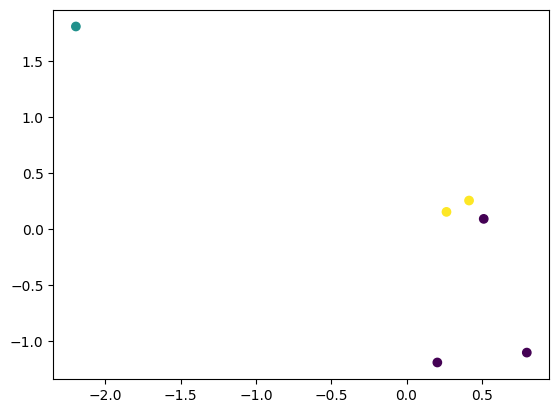

In [11]:
plt.scatter(x = x['Latitude'], y= x['Longitude'], c= y_pred)

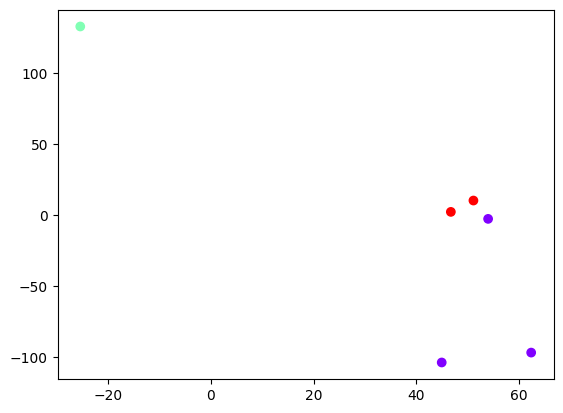

In [12]:
plt.scatter(x = df['Latitude'], y= df['Longitude'], c= y_pred, cmap='rainbow')

In [13]:
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German,Target
0,0.204344,-1.193114,0,0,0,0,0,1,1,0,0,0
1,0.798128,-1.104870,0,1,0,0,0,0,1,0,0,0
2,0.264983,0.151062,0,0,1,0,0,0,0,1,0,2
3,0.512308,0.088645,0,0,0,0,1,0,1,0,0,0
4,0.414877,0.252347,0,0,0,1,0,0,0,0,1,2
5,-2.194639,1.805930,1,0,0,0,0,0,1,0,0,1


In [ ]:
C3 >> 53.685, 100.285
C2 >> 50.63, 3.42
C1 >> -25.45, 133.11

In [20]:
(103.77 + 96.80)/2

100.285

In [14]:
kmean_model.cluster_centers_

array([[ 0.5049264 , -0.73644639,  0.        ,  0.33333333,  0.        ,
         0.        ,  0.33333333,  0.33333333,  1.        ,  0.        ,
         0.        ],
       [-2.19463851,  1.80593003,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.33992965,  0.20170456,  0.        ,  0.        ,  0.5       ,
         0.5       ,  0.        ,  0.        ,  0.        ,  0.5       ,
         0.5       ]])

# WCSS

In [ ]:
WCSS >> Within Cluster Sum off Squares

In [22]:
kmean_model

KMeans(n_clusters=3)

In [15]:
kmean_model.inertia_

5.217792873749753

In [16]:
kmean_model = KMeans(n_clusters=6)
y_pred = kmean_model.fit_predict(x)

kmean_model.inertia_

0.0

# Elbow Method

In [17]:
k_values = range(1,7)
wcss_list = []

for i in k_values:
    kmean_model = KMeans(n_clusters=i)
    y_pred = kmean_model.fit_predict(x)

    wcss = kmean_model.inertia_
    wcss_list.append(wcss)
    
    print(i, ">>", wcss)

1 >> 24.833333333333336
2 >> 13.882842941060659
3 >> 5.217792873749753
4 >> 3.1965465949408465
5 >> 1.1801832061917716
6 >> 0.0


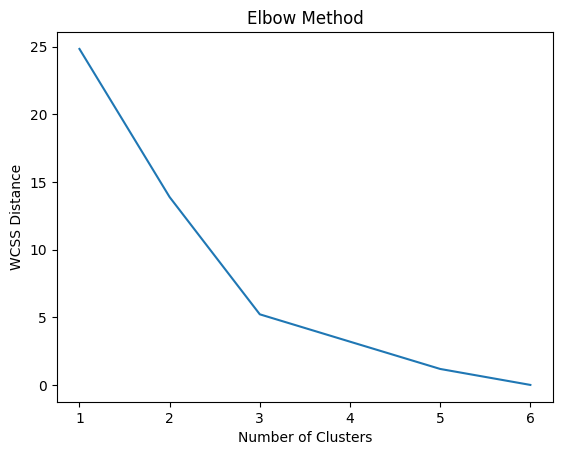

In [18]:
plt.plot(k_values, wcss_list)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Distance")
plt.title("Elbow Method")
plt.savefig("Elbow_Method.png")